In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('/kaggle/input/diabetes-detection-using-logistic-reg-eda/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)


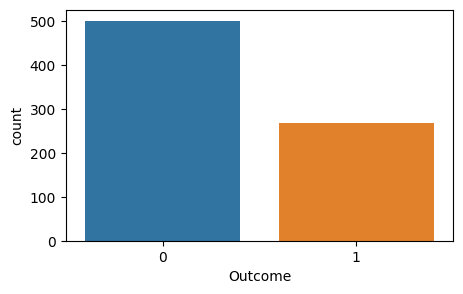

In [5]:
plt.figure(figsize=(5,3))
sns.countplot(x="Outcome" , data = data)
plt.show()

In [6]:


x=data.drop(columns = 'Outcome', axis=1)
y=data["Outcome"]



In [7]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
print(x_scaler)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [8]:
train_x,test_x,train_y, test_y=train_test_split(x_scaler,y,test_size = 0.2, stratify=y, random_state=1)

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [10]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 1)
x_resam, y_resam = over.fit_resample(train_x, train_y)
Counter(y_resam)

Counter({1: 400, 0: 400})

In [11]:
#x_train_re, x_test_re, y_train_re, y_test_re = train_test_split(x_resam, y_resam, test_size=0.2, random_state=1)

In [12]:
def model(classifier,xtrain,ytrain):
    classifier.fit(xtrain,ytrain)
    return classifier

In [13]:
def model_evaluation(classifier,xtest,ytest):
    y_pred=classifier.predict(xtest)
    acc=accuracy_score(ytest,y_pred)
    #cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(acc))
    #print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(ytest,y_pred)))
    print("#########  Confusion Matrix  ########")
    cm = confusion_matrix(ytest,y_pred)
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(ytest,y_pred))
    data= {
        'ytest': ytest,
        'ypred': y_pred
    }
    
    
   
    df2 = pd.DataFrame(data)
    print(df2.head(10))

Decision tree Classifier model for imbalanced dataset
Accuracy :  73.38%
ROC_AUC Score :  73.54%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       100
           1       0.60      0.74      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.74       154

     ytest  ypred
488      0      0
413      0      0
112      0      0
222      0      1
711      0      1
552      0      1
607      0      0
599      0      0
409      1      1
268      0      0


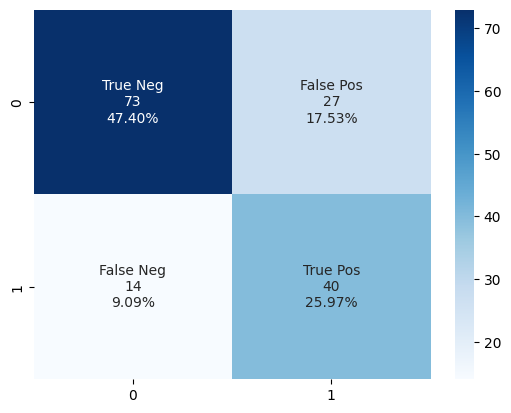

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
print("Decision tree Classifier model for imbalanced dataset")
classifier_dt_im=model(classifier_dt,train_x,train_y)
model_evaluation(classifier_dt_im,test_x,test_y)

RandomForestClassifier model for imbalanced dataset
Accuracy :  73.38%
ROC_AUC Score :  67.57%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154

     ytest  ypred
488      0      0
413      0      0
112      0      0
222      0      0
711      0      0
552      0      0
607      0      0
599      0      0
409      1      1
268      0      0


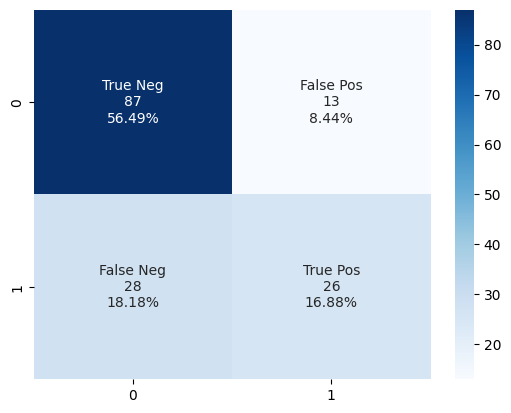

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state = 42)
print("RandomForestClassifier model for imbalanced dataset")
classifier_rf=model(rf,train_x,train_y)
model_evaluation(classifier_rf,test_x,test_y)

In [16]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


ExtraTreesClassifier model for imbalanced dataset
Accuracy :  73.38%
ROC_AUC Score :  68.00%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       100
           1       0.66      0.50      0.57        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154

     ytest  ypred
488      0      0
413      0      0
112      0      0
222      0      1
711      0      0
552      0      0
607      0      0
599      0      0
409      1      1
268      0      0


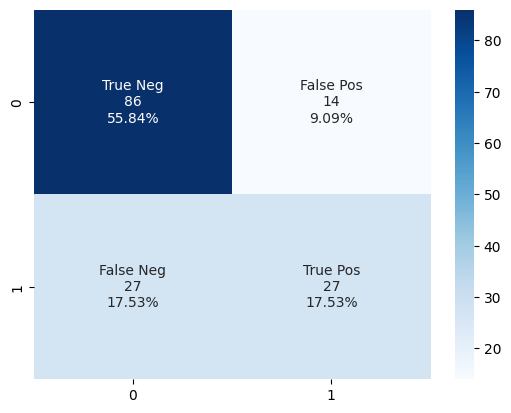

In [17]:
classifier_bg=ExtraTreesClassifier(n_estimators=500)
print("ExtraTreesClassifier model for imbalanced dataset")
classifier_ex=model(classifier_bg,train_x,train_y)
model_evaluation(classifier_ex,test_x,test_y)

Logistic regression model for imbalanced dataset
Accuracy :  78.57%
ROC_AUC Score :  72.85%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154

     ytest  ypred
488      0      0
413      0      0
112      0      0
222      0      0
711      0      0
552      0      0
607      0      0
599      0      0
409      1      1
268      0      0


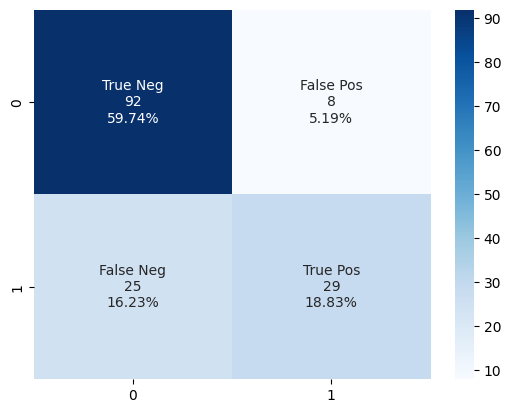

In [18]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(max_iter=500)
print("Logistic regression model for imbalanced dataset")
classifier_lr_im=model(classifier_lr,train_x,train_y)
model_evaluation(classifier_lr_im,test_x,test_y)

GradientBoostingClassifier model for imbalanced dataset
Accuracy :  76.62%
ROC_AUC Score :  71.78%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

     ytest  ypred
488      0      0
413      0      0
112      0      0
222      0      0
711      0      0
552      0      0
607      0      0
599      0      0
409      1      1
268      0      0


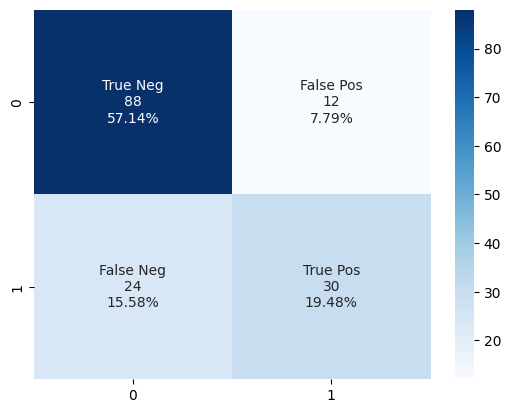

In [19]:
from sklearn.ensemble import  GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=150)
print("GradientBoostingClassifier model for imbalanced dataset")
classifier_gb_im=model(gb,train_x,train_y)
model_evaluation(classifier_gb_im,test_x,test_y)

GradientBoostingClassifier model for imbalanced dataset
Accuracy :  72.08%
ROC_AUC Score :  65.30%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154

     ytest  ypred
488      0      0
413      0      0
112      0      0
222      0      1
711      0      0
552      0      0
607      0      0
599      0      0
409      1      0
268      0      0


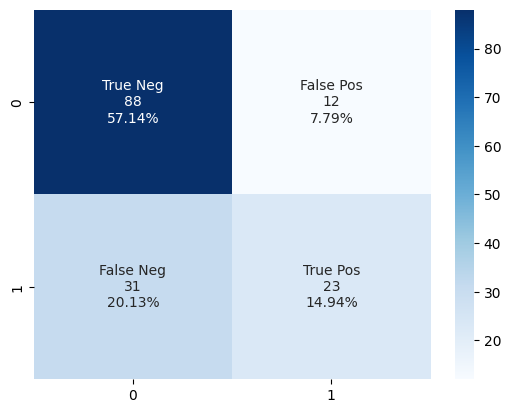

In [20]:
from sklearn.svm import SVC
model_svc = SVC()
print("GradientBoostingClassifier model for imbalanced dataset")
classifier_svc=model(model_svc,train_x,train_y)
model_evaluation(classifier_svc,test_x,test_y)

In [21]:
# Best model logistic regression getting accuracy of 78.57%
y_pred=classifier_lr_im.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

0.7857142857142857


In [22]:
import pickle
pickle.dump(classifier_lr_im,open('/kaggle/working/diabetics_model.pkl','wb'))